<div style="display: flex; align-items: center;">
    <img src="https://developers.lseg.com/content/dam/devportal/icons/logo/lseg-logo.svg" width="20%" style="vertical-align: top;">
    <h1 style="margin-left: 20px;">LD Lib. Python Tutorial 7 - Search</h1>
</div>


## Search

We spoke at length about the LSEG Data Model. Let's not repeat ourselves, and instead focuss on the task at hand: Search.

The following is mostly based on the amazing articles "[Building Search into your Application Workflow](https://developers.lseg.com/en/article-catalog/article/building-search-into-your-application-workflow)" and "[Build queries easily using Refinitiv's Search API with Python and Jupyter](https://developers.lseg.com/en/article-catalog/article/build-expressions-with-refinitiv-search-python-jupyter-notebook)". I would suggest reading them.

## Install & Import the LSEG Data Library

To install libraries in python, you can find the command in PyPl, in this instance, it is:

In [1]:
# pip install lseg-data

In [2]:
import lseg.data as ld

In [3]:
ld.__version__

'2.0.0'

## Desktop Session

### Authentification to LSEG Service

Desktop Session use-cases are the simples ones, so let's start there. We can authenticate ourselves with the Workspace Desktop App open with simply just the Python line:

In [4]:
ld.open_session()

<lseg.data.session.Definition object at 0x28c6112c590 {name='workspace'}>

In [5]:
ld.open_session(
    config_name="C:\Example.DataLibrary.Python-main\Configuration\lseg-data.config2.json",
    name="desktop.workspace")

<lseg.data.session.Definition object at 0x28c61254c90 {name='workspace'}>

On my machine, in the location "C:\Example.DataLibrary.Python-main\Configuration\", I put my Configuration File (a template of which can be found [here](https://github.com/LSEG-API-Samples/Example.DataLibrary.Python/blob/lseg-data-examples/Configuration/lseg-data.config.json)) named "lseg-data.config2.json". I named mine with a "2" because I made a new one specifically for this Tutorial.

### Access Layer (more precisely the Discovery Layer in this case) `ld.discovery.search`

You can think of the Search function in the LSEG Data Library (LDL) like the search bar of the Workspace App. This is an simplification, and the Search function in the LDL is a lot more powerful, but let's stick with the analogy. You can call upon this function as such:

```
# Access Layer
ld.discovery.search(
    view: Views | str = Views.SEARCH_ALL,
    query: OptStr = None,
    filter: OptStr = None,
    order_by: OptStr = None,
    select: OptStr = None,
    boost: OptStr = None,
    top: int = 10,
    skip: int = 0,
    group_by: OptStr = None,
    group_count: int = 3,
    features: OptStr = None,
    scope: OptStr = None,
    terms: OptStr = None)
```


You can access this Access Layer `search` function inside the `ld.discovery` module; *Exempli gratia (E.g.)*:

In [6]:
ld.discovery.search(
        view=ld.discovery.Views.DERIVATIVE_QUOTES,
        query='LSEG',
        filter="SearchAllCategory eq 'Options' and Periodicity eq 'Monthly' ",
        select='ExchangeCode',
        group_by='ExchangeCode',
        top=10)

ExchangeCode
0          IEU
1          IEU
2          IEU

Note that you can access further search functionalities in the Content Layer via the `ld.content.search.Definition()` function. More about this later; let's focus on the Access Layer `ld.discovery.search()` function to start with.

#### `query` argument

Nick Zincone said it best when he [wrote](https://developers.lseg.com/en/article-catalog/article/building-search-into-your-application-workflow) "The most basic search that can be performed is the query. The query is a free-formed text expression, similar to the type of query you can perform within Google, matching against documents within the specified view. For example, retrieve documents referencing the term: 'IBM'"

In [5]:
ld.discovery.search(
    query="IBM")

BusinessEntity                                      DocumentTitle  \
0   ORGANISATION  International Business Machines Corp, Public C...   
1   ORGANISATION                      Banco IBM SA, Private Company   
2   QUOTExEQUITY  International Business Machines Corp, Ordinary...   
3   ORGANISATION  Ibm International Capital Pte Ltd, Private Com...   
4   ORGANISATION  Tiers Corporate Bond Backed Certificates Trust...   
5   QUOTExEQUITY  Eurex IBM Single Stock Dividend Future Chain C...   
6   QUOTExEQUITY  Eurex IBM Single Stock Equity Future Chain Con...   
7   QUOTExEQUITY  Euronext Amsterdam IBM Dividend Future Chain C...   
8   QUOTExEQUITY  Eurex IBM Single Stock Equity Future Continuat...   
9   QUOTExEQUITY  Eurex IBM Single Stock Dividend Future Continu...   

        PermID         PI       RIC  
0         <NA>      37036      <NA>  
1         <NA>      76208      <NA>  
2  55839165994    1097326       IBM  
3         <NA>   43943628      <NA>  
4         <NA>   18062670      <NA>  
5  21539944402  156524731   0#I2BM:  
6  21481052421   48924732   0#IBMF:  
7  21612423771  259118763  0#IBMDF:  
8  21481052892   49450681    IBMFc1  
9  21540050935  156654756    I2BMc1

Query supports the following syntax:

| Feature                | Example               | Meaning                                                                 |
|------------------------|-----------------------|-------------------------------------------------------------------------|
| Free text              | 'chinese shipping'    | Matches any document that contains the words 'chinese' and 'shipping', in any order. |
| Phrases                | '"hong kong"'         | Phrases must appear in quotes. The phrase must match as specified. Case and (most) punctuation is ignored. |
| Wildcards              | 'green*'              | Will match green, greenfield, Greensleeves, etc.                        |
| Boolean operators AND  | 'cheese AND wine'     | Both cheese and wine must appear in the document.                       |
| Boolean operators OR   | 'cheese OR wine'      | Either cheese or wine must appear.                                      |
| Boolean operators NOT  | 'not wine'            | The word wine must not appear.                                          |


Refer to the [Playground Reference](https://apidocs.refinitiv.com/Apps/ApiDocs#/details/L2Rpc2NvdmVyeS9zZWFyY2gvdjE=/Lw==/POST/README) documentation for more details and specific behavior when applying query expressions.

#### `view` argument

The views you have access to depends on your license. For now we will stick to the Desktop Session; but for more information about your permissions and `view` access, see the 'Platform Session' section of this article below.

You can use the `ld.discovery.Views` objects or simple strings as the view argument. Here is an example of it with the `ld.discovery.Views` object:

In [7]:
ld.discovery.search(
        view=ld.discovery.Views.DERIVATIVE_QUOTES,
        query='LSEG',
        filter="SearchAllCategory eq 'Options' and Periodicity eq 'Monthly' ",
        select='ExchangeCode')

ExchangeCode
0          IEU
1          IEU
2          IEU
3          IEU
4          IEU
5          IEU
6          IEU
7          IEU
8          IEU
9          IEU

Here is an example of it with a string object:

In [66]:
ld.discovery.search(
        view="DerivativeQuotes",
        query='LSEG',
        filter="SearchAllCategory eq 'Options' and Periodicity eq 'Monthly' ",
        select='ExchangeCode')

ExchangeCode
0          IEU
1          IEU
2          IEU
3          IEU
4          IEU
5          IEU
6          IEU
7          IEU
8          IEU
9          IEU

You can view an updated list with:

In [7]:
for i in ld.discovery.Views:
    print(i)

BondFutOptQuotes
CdsInstruments
CdsQuotes
CmoInstruments
CmoQuotes
CommodityQuotes
DealsMergersAndAcquisitions
DerivativeInstruments
DerivativeQuotes
EquityDerivativeInstruments
EquityDerivativeQuotes
EquityInstruments
EquityQuotes
FixedIncomeInstruments
FixedIncomeQuotes
FundQuotes
GovCorpInstruments
GovCorpQuotes
IndexInstruments
IndexQuotes
IndicatorQuotes
Instruments
IRDQuotes
LoanInstruments
LoanQuotes
MoneyQuotes
MortgageInstruments
MortQuotes
MunicipalInstruments
MunicipalQuotes
Organisations
People
PhysicalAssets
Quotes
QuotesAndSTIRs
SearchAll
STIRs
VesselPhysicalAssets
YieldCurveContQuotes
RCS
Investors
CatalogItems
Entities


You can also see a list of the LDL objects for these views with `help`:

In [68]:
help(ld.discovery.Views)

Help on class Views in module lseg.data.content.search._views:

class Views(lseg.data._base_enum.StrEnum)
 |  Views(value, names=None, *, module=None, qualname=None, type=None, start=1)
 |  
 |  Possible views values to request data from 'search' endpoint
 |  
 |  Method resolution order:
 |      Views
 |      lseg.data._base_enum.StrEnum
 |      builtins.str
 |      enum.Enum
 |      builtins.object
 |  
 |  Data and other attributes defined here:
 |  
 |  BOND_FUT_OPT_QUOTES = <Views.BOND_FUT_OPT_QUOTES: 'BondFutOptQuotes'>
 |  
 |  CATALOG_ITEMS = <Views.CATALOG_ITEMS: 'CatalogItems'>
 |  
 |  CDS_INSTRUMENTS = <Views.CDS_INSTRUMENTS: 'CdsInstruments'>
 |  
 |  CDS_QUOTES = <Views.CDS_QUOTES: 'CdsQuotes'>
 |  
 |  CMO_INSTRUMENTS = <Views.CMO_INSTRUMENTS: 'CmoInstruments'>
 |  
 |  CMO_QUOTES = <Views.CMO_QUOTES: 'CmoQuotes'>
 |  
 |  COMMODITY_QUOTES = <Views.COMMODITY_QUOTES: 'CommodityQuotes'>
 |  
 |  DEALS_MERGERS_AND_ACQUISITIONS = <Views.DEALS_MERGERS_AND_ACQUISITIONS...
 |  

How can I find out which view is best for me? You can test them:

In [69]:
lst_vws = [
    ld.discovery.Views.BOND_FUT_OPT_QUOTES, ld.discovery.Views.CATALOG_ITEMS,
    ld.discovery.Views.CDS_INSTRUMENTS, ld.discovery.Views.CDS_QUOTES, ld.discovery.Views.CMO_INSTRUMENTS,
    ld.discovery.Views.CMO_QUOTES, ld.discovery.Views.COMMODITY_QUOTES,
    ld.discovery.Views.DEALS_MERGERS_AND_ACQUISITIONS, ld.discovery.Views.DERIVATIVE_INSTRUMENTS,
    ld.discovery.Views.DERIVATIVE_QUOTES, ld.discovery.Views.ENTITIES,
    ld.discovery.Views.EQUITY_DERIVATIVE_INSTRUMENTS, ld.discovery.Views.EQUITY_DERIVATIVE_QUOTES,
    ld.discovery.Views.EQUITY_INSTRUMENTS, ld.discovery.Views.EQUITY_QUOTES,
    ld.discovery.Views.FIXED_INCOME_INSTRUMENTS, ld.discovery.Views.FIXED_INCOME_QUOTES,
    ld.discovery.Views.FUND_QUOTES, ld.discovery.Views.GOV_CORP_INSTRUMENTS,
    ld.discovery.Views.GOV_CORP_QUOTES, ld.discovery.Views.INDEX_INSTRUMENTS,
    ld.discovery.Views.INDEX_QUOTES, ld.discovery.Views.INDICATOR_QUOTES,
    ld.discovery.Views.INSTRUMENTS, ld.discovery.Views.INVESTORS,
    ld.discovery.Views.IRD_QUOTES, ld.discovery.Views.LOAN_INSTRUMENTS,
    ld.discovery.Views.LOAN_QUOTES, ld.discovery.Views.MONEY_QUOTES,
    ld.discovery.Views.MORTGAGE_INSTRUMENTS, ld.discovery.Views.MORT_QUOTES,
    ld.discovery.Views.MUNICIPAL_INSTRUMENTS, ld.discovery.Views.MUNICIPAL_QUOTES,
    ld.discovery.Views.ORGANISATIONS, ld.discovery.Views.PEOPLE,
    ld.discovery.Views.PHYSICAL_ASSETS, ld.discovery.Views.QUOTES,
    ld.discovery.Views.QUOTES_AND_STIRS, ld.discovery.Views.RCS,
    ld.discovery.Views.SEARCH_ALL, ld.discovery.Views.STIRS,
    ld.discovery.Views.VESSEL_PHYSICAL_ASSETS, ld.discovery.Views.YIELD_CURVE_CONT_QUOTES]

In [70]:
for i in lst_vws:
    try:
        df = ld.discovery.search(
            view=i,
            query='LSEG',
            filter="SearchAllCategory eq 'Options' and Periodicity eq 'Monthly' ",
            select='ExchangeCode',
            group_by='ExchangeCode',
            top=10)
        if len(df) > 0:
            print(str(i))
            display(df)
    except:
        print(str(i) + " did not work.")

CatalogItems did not work.
DerivativeQuotes


ExchangeCode
0          IEU
1          IEU
2          IEU

Entities did not work.
EquityDerivativeQuotes


ExchangeCode
0          IEU
1          IEU
2          IEU

EquityQuotes


ExchangeCode
0          IEU
1          IEU
2          IEU

Quotes


ExchangeCode
0          IEU
1          IEU
2          IEU

QuotesAndSTIRs


ExchangeCode
0          IEU
1          IEU
2          IEU

SearchAll


ExchangeCode
0          IEU
1          IEU
2          IEU

This was a litle unwieldy. Let's not use a huge list like `lst_vws`; instead, let's populate the `view` argument with string objects:

In [71]:
for i in ld.discovery.Views:
    try:
        df = ld.discovery.search(
            view=i,
            query='LSEG',
            filter="SearchAllCategory eq 'Options' and Periodicity eq 'Monthly' ",
            select='ExchangeCode',
            group_by='ExchangeCode',
            top=10)
        if len(df) > 0:
            print(str(i))
            display(df)
    except:
        print(str(i) + " did not work.")

DerivativeQuotes


ExchangeCode
0          IEU
1          IEU
2          IEU

EquityDerivativeQuotes


ExchangeCode
0          IEU
1          IEU
2          IEU

EquityQuotes


ExchangeCode
0          IEU
1          IEU
2          IEU

Quotes


ExchangeCode
0          IEU
1          IEU
2          IEU

QuotesAndSTIRs


ExchangeCode
0          IEU
1          IEU
2          IEU

SearchAll


ExchangeCode
0          IEU
1          IEU
2          IEU

CatalogItems did not work.
Entities did not work.


Let's put it all together into a call for the `DERIVATIVE_QUOTES` view:

In [72]:
ld.discovery.search(
        view=ld.discovery.Views.DERIVATIVE_QUOTES,
        query='LSEG',
        filter="SearchAllCategory eq 'Options' and Periodicity eq 'Monthly' ",
        select='ExchangeCode',
        group_by='ExchangeCode',
        top=10)

ExchangeCode
0          IEU
1          IEU
2          IEU

If you don't know which view to go for, you canalways choose `ld.discovery.Views.SEARCH_ALL`

In [73]:
ld.discovery.search(
        view=ld.discovery.Views.SEARCH_ALL,
        query='LSEG',
        filter="SearchAllCategory eq 'Options' and Periodicity eq 'Monthly' ",
        select='ExchangeCode',
        group_by='ExchangeCode',
        top=10)

ExchangeCode
0          IEU
1          IEU
2          IEU

#### `top` argument

The `top` argument is rather self explanatory, and cuts the result up to that value; e.g., the code cell below, with the line `top=4`, will only show the top 4 results of the retreived data frame:

In [74]:
ld.discovery.search(
    query="LSEG.L",
    filter="SearchAllCategory eq 'Options' and Periodicity eq 'Monthly'")

BusinessEntity                                      DocumentTitle  \
0   QUOTExEQUITY  Intercontinental Exchange London Stock Exchang...   
1   QUOTExEQUITY  Intercontinental Exchange London Stock Exchang...   
2   QUOTExEQUITY  Intercontinental Exchange London Stock Exchang...   
3   QUOTExEQUITY  Intercontinental Exchange London Stock Exchang...   
4   QUOTExEQUITY  Intercontinental Exchange London Stock Exchang...   
5   QUOTExEQUITY  Intercontinental Exchange London Stock Exchang...   
6   QUOTExEQUITY  Intercontinental Exchange London Stock Exchang...   
7   QUOTExEQUITY  Intercontinental Exchange London Stock Exchang...   
8   QUOTExEQUITY  Intercontinental Exchange London Stock Exchang...   
9   QUOTExEQUITY  Intercontinental Exchange London Stock Exchang...   

        PermID         PI            RIC  
0  22004975799  753282550  LSEG10500I4.L  
1  22004307053  752338001   LSEG9750I4.L  
2  21798131428  494911466  LSEG10000I4.L  
3  22004306840  752337878   LSEG9750J4.L  
4  21970794791  703957408   LSEG9500U4.L  
5  21796235090  492517365   LSEG9600I4.L  
6  22000379851  746927237   LSEG9250J4.L  
7  21970795055  703957773   LSEG9500L4.L  
8  21796235108  492517394   LSEG9600J4.L  
9  21798131470  494911506  LSEG10000J4.L

In [75]:
ld.discovery.search(
    query="LSEG.L",
    top=4,
    filter="SearchAllCategory eq 'Options' and Periodicity eq 'Monthly'")

BusinessEntity                                      DocumentTitle  \
0   QUOTExEQUITY  Intercontinental Exchange London Stock Exchang...   
1   QUOTExEQUITY  Intercontinental Exchange London Stock Exchang...   
2   QUOTExEQUITY  Intercontinental Exchange London Stock Exchang...   
3   QUOTExEQUITY  Intercontinental Exchange London Stock Exchang...   

        PermID         PI            RIC  
0  22004975799  753282550  LSEG10500I4.L  
1  22004307053  752338001   LSEG9750I4.L  
2  21798131428  494911466  LSEG10000I4.L  
3  22004306840  752337878   LSEG9750J4.L

Note that the default for `top` is 10, and the max is `10000`

#### `select` argument and the `SearchPropertyExplorer` & `PropertyType` modules

You can find the fields available for you to use in the `select` argument with the `SearchPropertyExplorer` module (within the `discovery` module). This is why `search` is a module, and not a function; to deliminate it from the `discovery` module among others.

In [8]:
# Get properties for the query "LSEG bonds"
props = ld.discovery.SearchPropertyExplorer.get_properties_for(
    query="LSEG bonds")
props.df

Property  \
0                       RCSCurrencyLeafML   
1                       RCSPrefTypeNameML   
2                           WorstCorpDV01   
3       CdsSeniorityEquivalentDescription   
4     IssuerRatingLatestSourceDescription   
...                                   ...   
1088                        PrevOASChange   
1089                     PricingTradeDate   
1090                 MarketMakerBondChain   
1091             OptionAdjustedOptionCost   
1092                       IssuerOAPermID   

                                          Example Value    Type Searchable  \
0                          ja ユーロ|zh-Hans 欧元|zh-Hant 歐元  String       True   
1     ja 優先タイプ\償還型|zh-Hans 优先股类型\可赎回|zh-Hant 優先股類型\可...  String       True   
2                                              0.005166  Double       True   
3                                      Senior Unsecured  String       True   
4                 Moody's Most Recent Short-term Rating  String       True   
...                                                 ...     ...        ...   
1088                                           1.246713  Double       True   
1089                           2024-09-19T00:00:00.000Z    Date       True   
1090  <a:Rship name="x" xmlns:a="http://www.reuters....    <NA>       <NA>   
1091                                          -0.000322  Double       True   
1092                                         5079682416  String       True   

     Sortable Navigable  Exact Groupable Symbol  
0       False     False   True     False  False  
1       False     False   True     False  False  
2        True      True  False     False  False  
3       False     False  False     False  False  
4        True      True   True      True  False  
...       ...       ...    ...       ...    ...  
1088     True      True  False     False  False  
1089     True      True  False     False  False  
1090     <NA>      <NA>   <NA>      <NA>   <NA>  
1091     True      True  False     False  False  
1092    False     False   True      True   True  

[1093 rows x 9 columns]

In [10]:
# ld.discovery.search(
#     query="LSEG bonds",
#     select="RCSCurrencyLeafML",
#     top=15)

You can apply the fields found in your request:

In [11]:
list(props.df.Property.values[1:6])

['RCSPrefTypeNameML',
 'WorstCorpDV01',
 'CdsSeniorityEquivalentDescription',
 'IssuerRatingLatestSourceDescription',
 'RCSPrefTypeName']

In [12]:
", ".join(list(props.df.Property.values[1:6]))

'RCSPrefTypeNameML, WorstCorpDV01, CdsSeniorityEquivalentDescription, IssuerRatingLatestSourceDescription, RCSPrefTypeName'

In [13]:
# Make a string of the 1st and 2nd elements of the Properties found in the `props.df`
str_of_properties = ", ".join(list(props.df.Property.values[1:6]))
str_of_properties

'RCSPrefTypeNameML, WorstCorpDV01, CdsSeniorityEquivalentDescription, IssuerRatingLatestSourceDescription, RCSPrefTypeName'

In [14]:
ld.discovery.search(
    query="LSEG bonds",
    select=str_of_properties,
    top=15)

RCSPrefTypeNameML  WorstCorpDV01  \
0   [ja 優先タイプ\償還型, zh-Hans 优先股类型\可赎回, zh-Hant 優先股類...       0.005166   
1                                                <NA>       0.014368   
2                                                <NA>       0.014364   
3                                                <NA>       0.019061   
4                                                <NA>       0.023186   
5                                                <NA>       0.023181   
6   [ja 優先タイプ\償還型, zh-Hans 优先股类型\可赎回, zh-Hant 優先股類...       0.028621   
7                                                <NA>       0.029971   
8                                                <NA>       0.031732   
9                                                <NA>       0.031232   
10                                               <NA>       0.031155   
11                                               <NA>       0.044868   
12  [ja 優先タイプ\償還型, zh-Hans 优先股类型\可赎回, zh-Hant 優先股類...       0.045167   
13                                               <NA>       0.054398   
14                                               <NA>       0.052101   

   CdsSeniorityEquivalentDescription      IssuerRatingLatestSourceDescription  \
0                   Senior Unsecured    Moody's Most Recent Short-term Rating   
1                   Senior Unsecured  Moody's Derived Long-term Issuer Rating   
2                   Senior Unsecured  Moody's Derived Long-term Issuer Rating   
3                   Senior Unsecured    Moody's Most Recent Short-term Rating   
4                   Senior Unsecured    Moody's Most Recent Short-term Rating   
5                   Senior Unsecured    Moody's Most Recent Short-term Rating   
6                   Senior Unsecured    Moody's Most Recent Short-term Rating   
7                   Senior Unsecured    Moody's Most Recent Short-term Rating   
8                   Senior Unsecured    Moody's Most Recent Short-term Rating   
9                   Senior Unsecured    Moody's Most Recent Short-term Rating   
10                  Senior Unsecured  Moody's Derived Long-term Issuer Rating   
11                  Senior Unsecured    Moody's Most Recent Short-term Rating   
12                  Senior Unsecured    Moody's Most Recent Short-term Rating   
13                  Senior Unsecured    Moody's Most Recent Short-term Rating   
14                  Senior Unsecured  Moody's Derived Long-term Issuer Rating   

                           RCSPrefTypeName  
0   Preference / Preferred Type\Redeemable  
1                                     <NA>  
2                                     <NA>  
3                                     <NA>  
4                                     <NA>  
5                                     <NA>  
6   Preference / Preferred Type\Redeemable  
7                                     <NA>  
8                                     <NA>  
9                                     <NA>  
10                                    <NA>  
11                                    <NA>  
12  Preference / Preferred Type\Redeemable  
13                                    <NA>  
14                                    <NA>

And you can also find the number of hits for the property list you found

In [15]:
print(props.hits_count)

1284


You can even filter for words within the df of properties:

In [80]:
df = props.get_by_name("perpetual").df
df

Property Example Value     Type Searchable Sortable Navigable  \
855  IsPerpetualSecurity         False  Boolean       True     True     False   

     Exact Groupable Symbol  
855  False     False  False

In [17]:
ld.discovery.search(
    query="LSEG bonds",
    select="IsPerpetualSecurity",
    top=15)

IsPerpetualSecurity
0                 False
1                 False
2                 False
3                 False
4                 False
5                 False
6                 False
7                 False
8                 False
9                 False
10                False
11                False
12                False
13                False
14                False

Note that partial matches work too:

In [18]:
df = props.get_by_name("perpet").df
df

Property Example Value     Type Searchable Sortable Navigable  \
914  IsPerpetualSecurity         False  Boolean       True     True     False   

     Exact Groupable Symbol  
914  False     False  False

You can programatically check if a property is, say, searchable or navigatable:

In [82]:
df.Searchable.values[0]

'True'

You can also try and make sure you're picking properties with specific characteristic. E.g.: only fields that are navigable (and be used in the `navigation` parameter of the search function):

In [19]:
props.df

Property  \
0                       RCSCurrencyLeafML   
1                       RCSPrefTypeNameML   
2                           WorstCorpDV01   
3       CdsSeniorityEquivalentDescription   
4     IssuerRatingLatestSourceDescription   
...                                   ...   
1088                        PrevOASChange   
1089                     PricingTradeDate   
1090                 MarketMakerBondChain   
1091             OptionAdjustedOptionCost   
1092                       IssuerOAPermID   

                                          Example Value    Type Searchable  \
0                          ja ユーロ|zh-Hans 欧元|zh-Hant 歐元  String       True   
1     ja 優先タイプ\償還型|zh-Hans 优先股类型\可赎回|zh-Hant 優先股類型\可...  String       True   
2                                              0.005166  Double       True   
3                                      Senior Unsecured  String       True   
4                 Moody's Most Recent Short-term Rating  String       True   
...                                                 ...     ...        ...   
1088                                           1.246713  Double       True   
1089                           2024-09-19T00:00:00.000Z    Date       True   
1090  <a:Rship name="x" xmlns:a="http://www.reuters....    <NA>       <NA>   
1091                                          -0.000322  Double       True   
1092                                         5079682416  String       True   

     Sortable Navigable  Exact Groupable Symbol  
0       False     False   True     False  False  
1       False     False   True     False  False  
2        True      True  False     False  False  
3       False     False  False     False  False  
4        True      True   True      True  False  
...       ...       ...    ...       ...    ...  
1088     True      True  False     False  False  
1089     True      True  False     False  False  
1090     <NA>      <NA>   <NA>      <NA>   <NA>  
1091     True      True  False     False  False  
1092    False     False   True      True   True  

[1093 rows x 9 columns]

In [20]:
navigable = props.get_navigable()
navigable.df

Property  \
2                           WorstCorpDV01   
4     IssuerRatingLatestSourceDescription   
8               RCSIssuerCountryGenealogy   
9                MaturityStandardOTRYield   
10                    RCSCountryGenealogy   
...                                   ...   
1082            InstrumentTypeDescription   
1086                      FaceOutstanding   
1088                        PrevOASChange   
1089                     PricingTradeDate   
1091             OptionAdjustedOptionCost   

                                          Example Value    Type Searchable  \
2                                              0.005166  Double       True   
4                 Moody's Most Recent Short-term Rating  String       True   
8     M:DQ\G:AK\G:7K|M:DQ\G:AL\G:7K|M:DQ\G:AN\G:7K|M...  String       True   
9                                                 3.126  Double       True   
10                                            M:1EW\A:S  String       True   
...                                                 ...     ...        ...   
1082                                               Note  String       True   
1086                                          500000000  Double       True   
1088                                           1.246713  Double       True   
1089                           2024-09-19T00:00:00.000Z    Date       True   
1091                                          -0.000322  Double       True   

     Sortable Navigable  Exact Groupable Symbol  
2        True      True  False     False  False  
4        True      True   True      True  False  
8        True      True   True      True  False  
9        True      True  False     False  False  
10       True      True   True      True  False  
...       ...       ...    ...       ...    ...  
1082     True      True   True      True  False  
1086     True      True  False     False  False  
1088     True      True  False     False  False  
1089     True      True  False     False  False  
1091     True      True  False     False  False  

[286 rows x 9 columns]

You can see all the types easily too:

In [84]:
navigable.df.Type.unique()

array(['String', 'Double', 'Date', 'Boolean'], dtype=object)

In [85]:
navigable.df[navigable.df.Type == "Boolean"]

Property Example Value     Type Searchable Sortable Navigable  \
605  IsTRACEEligible         False  Boolean       True     True      True   
659      IsBenchmark         False  Boolean       True     True      True   
681         IsActive          True  Boolean       True     True      True   
902      IsGreenBond         False  Boolean       True    False      True   
921        IsESGBond         False  Boolean       True    False      True   
931       IsStraight         False  Boolean       True     True      True   

     Exact Groupable Symbol  
605  False     False  False  
659  False     False  False  
681  False     False  False  
902  False     False  False  
921  False     False  False  
931  False     False  False

You can find the same information with the `PropertyType` module. This is the advised path to take, as it filters all fields with your asked filter (in the below e.g.: only boolean returning fields)

In [86]:
props.get_by_type(ld.discovery.PropertyType.Boolean).df

Property Example Value     Type Searchable  \
46               IsExecutableQuoted          True  Boolean       True   
55                IsMainIssueFiling          True  Boolean       True   
62    ContributorsScope.IsBenchmark         False  Boolean       True   
64         ContributorsScope.IsSIMC         False  Boolean       True   
68    ContributorsScope.IsBenchmark         False  Boolean       True   
...                             ...           ...      ...        ...   
1025                  OfficersExist          True  Boolean       True   
1026                      IsProRata         False  Boolean       True   
1044                    IsPayInPart         False  Boolean       True   
1182            IsCurrentlyCallable          True  Boolean       True   
1188                        IsMiFID         False  Boolean       True   

     Sortable Navigable  Exact Groupable Symbol  
46       True     False  False     False  False  
55       True     False  False     False  False  
62       True     False  False     False  False  
64       True     False  False     False  False  
68       True     False  False     False  False  
...       ...       ...    ...       ...    ...  
1025    False     False  False     False  False  
1026    False     False  False     False  False  
1044    False     False  False     False  False  
1182    False     False  False     False  False  
1188     True     False  False     False  False  

[170 rows x 9 columns]

In [13]:
props.df[props.df.Searchable == "False"]

Property  \
40                               PILC   
53                   DenominationType   
89                           Filtered   
106                      AssetSubType   
213                 CouponRatePercent   
581                       EcbCodeDesc   
591                          CallType   
824                              TIID   
828  LocalCodesLocalSchemeDescription   
835                   GoverningLawIds   
956                 DTCharacteristics   

                                         Example Value    Type Searchable  \
40                                           228804953  String      False   
53                                                 REG  String      False   
89                                               False  String      False   
106                                               EURO  String      False   
213                                          00000% 0%  String      False   
581                                       ECB Eligible  String      False   
591                                                CSH  String      False   
824                                           18496850  String      False   
828  RIC:DEA3KN7G=D:RIC|RIC:XS2327298217=GFGL:RIC|O...  String      False   
835                                          ~~ENGLAND  String      False   
956                                LSEGN 0 06-Apr-2025  String      False   

    Sortable Navigable  Exact Groupable Symbol  
40     False     False  False     False  False  
53     False     False  False     False  False  
89     False     False  False     False  False  
106    False     False  False     False  False  
213    False     False  False     False  False  
581    False     False  False     False  False  
591    False     False  False     False  False  
824    False     False  False     False  False  
828    False     False  False     False  False  
835    False     False  False     False  False  
956    False     False  False     False  False

In [23]:
ld.discovery.search(
    query="LSEG bonds",
    # filter="PILC eq '228804953'",
    select="PILC",
    top=15)

PILC
0   228804953
1   228914022
2   228788847
3   335835105
4   358694858
5   358793498
6   382411133
7   169587527
8   228804954
9   228914021
10  228787936
11  147524860
12  228804952
13  335823836
14  228913832

##### Send navigators in request

The RCSIssuerCountryLeaf, or RCSIssuerCountry, properties are navigable.
Let's perform an execution and show what we can do...

In [87]:
props0 = ld.discovery.SearchPropertyExplorer.get_properties_for(
    view=ld.discovery.Views.GOV_CORP_INSTRUMENTS,
    query="LSEG bonds",
    # navigators = "RCSIssuerCountry, RCSIssuerCountryLeaf",
    # filter = "IsPerpetualSecurity ne true and IsActive eq true and not(AssetStatus in ('MAT' 'DC'))"
    )
props0.navigators

Empty DataFrame
Columns: []
Index: []

In [88]:
props0.df

Property  \
0                     DbType   
1          DescriptionDetail   
2              RCSTRBCNameML   
3                IssueRating   
4                       _UID   
...                      ...   
1187  CouponClassDescription   
1188                 IsMiFID   
1189    MarketMakerBondChain   
1190      PricingPrepaySpeed   
1191           AssetCategory   

                                          Example Value     Type Searchable  \
0                                                  CORP   String       True   
1                                   Sr Note Freq Annual   String       True   
2     ja 金融事業\銀行 & 投資サービス\投資銀行 & 投資サービス\金融 & 商品市場の運営...   String       True   
3                                                    A3   String       True   
4                                            2314154221     <NA>       <NA>   
...                                                 ...      ...        ...   
1187                                       Fixed Coupon   String       True   
1188                                              False  Boolean       True   
1189  <a:Rship name="x" xmlns:a="http://www.reuters....     <NA>       <NA>   
1190                                                  0   Double       True   
1191                                                FRB   String       True   

     Sortable Navigable  Exact Groupable Symbol  
0        True      True   True      True  False  
1        True     False  False     False  False  
2       False     False   True     False  False  
3       False      True   True      True   True  
4        <NA>      <NA>   <NA>      <NA>   <NA>  
...       ...       ...    ...       ...    ...  
1187     True      True   True      True  False  
1188     True     False  False     False  False  
1189     <NA>      <NA>   <NA>      <NA>   <NA>  
1190     True      True  False     False  False  
1191    False      True   True     False  False  

[1192 rows x 9 columns]

In [89]:
props0.properties["IssuerName"].get_possible_values().df

IssuerName  Count
0         LSEG Net    127
1              LSE    116
2  Lsega Financing     41
3        Refinitiv      8
4      Lseg Us Fin      4
5  BC Compensation      2
6    Frank Russell      1
7  Lond Stock Exch      1

In [90]:
props0.get_by_name("IssuerName").df

Property  \
10                                    SynonymIssuerName   
433   IssuerNameX1XIndustrySectorDescriptionX1XIssue...   
474                                 CompositeIssuerName   
683                                    ParentIssuerName   
715                          IssuerNameAlphabeticGroups   
737                                          IssuerName   
1076                              ParentImmedIssuerName   

                                          Example Value    Type Searchable  \
10                                                  LSE    <NA>       <NA>   
433                           LSE|Other Financial|70334    <NA>       <NA>   
474   LSE|Lun Dun Dui Zheng Quan Jiao Yi Suo Ji Tuan...    <NA>       <NA>   
683                                                 LSE  String       True   
715                                           J - L\LSE  String       True   
737                                                 LSE  String       True   
1076                                                LSE  String       True   

     Sortable Navigable  Exact Groupable Symbol  
10       <NA>      <NA>   <NA>      <NA>   <NA>  
433      <NA>      <NA>   <NA>      <NA>   <NA>  
474      <NA>      <NA>   <NA>      <NA>   <NA>  
683     False     False  False     False  False  
715     False     False   True     False  False  
737      True      True   True      True  False  
1076    False     False  False     False  False

In [24]:
props1 = ld.discovery.SearchPropertyExplorer.get_properties_for(
    view=ld.discovery.Views.GOV_CORP_INSTRUMENTS,
    query="LSEG bonds",
    # filter = "IsPerpetualSecurity ne true and IsActive eq true and not(AssetStatus in ('MAT' 'DC'))",
    navigators="RCSIssuerCountry, RCSIssuerCountryLeaf, IssueRating, DbType, CouponClassDescription")
props1.navigators

CouponClassDescription DbType IssueRating RCSIssuerCountry  \
0                   <NA>   CORP        <NA>             <NA>   
0   Discount/Zero Coupon   <NA>        <NA>             <NA>   
0                   <NA>   <NA>        <NA>             <NA>   
0                   <NA>   <NA>        <NA>             G:7J   
1                   <NA>   <NA>        <NA>             <NA>   
1                   <NA>   <NA>        <NA>             G:7K   
1           Fixed Coupon   <NA>        <NA>             <NA>   
0                   <NA>   <NA>          A3             <NA>   
2                   <NA>   <NA>        <NA>             <NA>   
2                   <NA>   <NA>        <NA>             G:6J   
1                   <NA>   <NA>          WD             <NA>   
3                   <NA>   <NA>        <NA>             G:5M   
3                   <NA>   <NA>         BB+             <NA>   
2                   <NA>   <NA>          B+             <NA>   
3                   <NA>   <NA>        <NA>             <NA>   
3        Variable Coupon   <NA>        <NA>             <NA>   
2        Floating Coupon   <NA>        <NA>             <NA>   

  RCSIssuerCountryLeaf  Count  
0                 <NA>    301  
0                 <NA>    262  
0       United Kingdom    158  
0                 <NA>    158  
1          Netherlands    128  
1                 <NA>    128  
1                 <NA>     37  
0                 <NA>     20  
2        United States     13  
2                 <NA>     13  
1                 <NA>      4  
3                 <NA>      2  
3                 <NA>      2  
2                 <NA>      2  
3               France      2  
3                 <NA>      1  
2                 <NA>      1

Retrieve navigator data from cache because navigator data was retrieved by using get_properties_for() method:

In [92]:
props2 = ld.discovery.SearchPropertyExplorer.get_properties_for(
    view = ld.discovery.Views.GOV_CORP_INSTRUMENTS,
    query = "LSEG bonds",
    navigators = "RCSIssuerCountryLeaf")

In [93]:
props2.navigators

RCSIssuerCountryLeaf  Count
0       United Kingdom    158
1          Netherlands    127
2        United States     13
3               France      2

In [94]:
rcs_issuer_country_leaf = props2.properties["RCSIssuerCountryLeaf"].get_possible_values()
rcs_issuer_country_leaf.df

RCSIssuerCountryLeaf  Count
0       United Kingdom    158
1          Netherlands    127
2        United States     13
3               France      2

#### `filter` argument

Let's say we would like to find LSEG.L options but filter our search so that we only have monthly options, not weekly ones:

In [26]:
optn_rics = ld.discovery.search(
    query="LSEG.L",
    filter="SearchAllCategory eq 'Options' and Periodicity eq 'Monthly'")
optn_rics.T

0  \
BusinessEntity                                       QUOTExEQUITY   
DocumentTitle   Intercontinental Exchange London Stock Exchang...   
PermID                                                22004975799   
PI                                                      753282550   
RIC                                                 LSEG10500I4.L   

                                                                1  \
BusinessEntity                                       QUOTExEQUITY   
DocumentTitle   Intercontinental Exchange London Stock Exchang...   
PermID                                                22004307053   
PI                                                      752338001   
RIC                                                  LSEG9750I4.L   

                                                                2  \
BusinessEntity                                       QUOTExEQUITY   
DocumentTitle   Intercontinental Exchange London Stock Exchang...   
PermID                                                21798131428   
PI                                                      494911466   
RIC                                                 LSEG10000I4.L   

                                                                3  \
BusinessEntity                                       QUOTExEQUITY   
DocumentTitle   Intercontinental Exchange London Stock Exchang...   
PermID                                                22004306840   
PI                                                      752337878   
RIC                                                  LSEG9750J4.L   

                                                                4  \
BusinessEntity                                       QUOTExEQUITY   
DocumentTitle   Intercontinental Exchange London Stock Exchang...   
PermID                                                21970794791   
PI                                                      703957408   
RIC                                                  LSEG9500U4.L   

                                                                5  \
BusinessEntity                                       QUOTExEQUITY   
DocumentTitle   Intercontinental Exchange London Stock Exchang...   
PermID                                                21796235090   
PI                                                      492517365   
RIC                                                  LSEG9600I4.L   

                                                                6  \
BusinessEntity                                       QUOTExEQUITY   
DocumentTitle   Intercontinental Exchange London Stock Exchang...   
PermID                                                22000379851   
PI                                                      746927237   
RIC                                                  LSEG9250J4.L   

                                                                7  \
BusinessEntity                                       QUOTExEQUITY   
DocumentTitle   Intercontinental Exchange London Stock Exchang...   
PermID                                                21970795055   
PI                                                      703957773   
RIC                                                  LSEG9500L4.L   

                                                                8  \
BusinessEntity                                       QUOTExEQUITY   
DocumentTitle   Intercontinental Exchange London Stock Exchang...   
PermID                                                21796235108   
PI                                                      492517394   
RIC                                                  LSEG9600J4.L   

                                                                9  
BusinessEntity                                       QUOTExEQUITY  
DocumentTitle   Intercontinental Exchange London Stock Exchang...  
PermID                                                21798131470  
PI                                                      4

You can then use the results to capture, say, price data:

In [27]:
optn_rics.RIC[0]

'LSEG10500I4.L'

Date           2024-08-15  2024-08-16  2024-08-19  2024-08-20  2024-08-21  \
LSEG10500I4.L                                                               
BID                 17.25        13.5        15.5        7.25         8.5   

Date           2024-08-22  2024-08-23  2024-08-27  2024-08-28  2024-08-29  \
LSEG10500I4.L                                                               
BID                 10.75        10.0        22.0        36.0       35.75   

Date           2024-08-30  2024-09-02  2024-09-04  2024-09-05  2024-09-06  \
LSEG10500I4.L                                                               
BID                  23.0        13.0        7.75        0.75        12.0   

Date           2024-09-09  2024-09-10  2024-09-11  2024-09-12  2024-09-13  
LSEG10500I4.L                                                              
BID                 37.25        33.0       42.25       53.75       62.25

<AxesSubplot:xlabel='Date'>

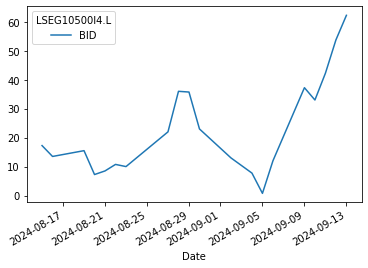

In [96]:
df = ld.get_history(universe=optn_rics.RIC[0], fields='BID')
display(df.T)
df.plot()

FYI: Filter expression utilizing 2 or more properties looks like this:

"IsActive eq True and not(AssetStatus in ('MAT' 'DC'))"

#### `boost` argument

As outlined by [Nick Zincone](https://developers.lseg.com/en/article-catalog/article/building-search-into-your-application-workflow), if I want to boost the result of all the LSEG options (monthly or weekly) but I want the monthly ones on top, I can apply a boost expression such as

In [97]:
ld.discovery.search(
    query="LSEG.L",
    filter="SearchAllCategory eq 'Options'",
    # boost = "Periodicity eq 'Monthly'",
    top=100)

BusinessEntity                                      DocumentTitle  \
0    QUOTExEQUITY  Intercontinental Exchange London Stock Exchang...   
1    QUOTExEQUITY  Intercontinental Exchange London Stock Exchang...   
2    QUOTExEQUITY  Intercontinental Exchange London Stock Exchang...   
3    QUOTExEQUITY  Intercontinental Exchange London Stock Exchang...   
4    QUOTExEQUITY  Intercontinental Exchange London Stock Exchang...   
..            ...                                                ...   
95   QUOTExEQUITY  Intercontinental Exchange London Stock Exchang...   
96   QUOTExEQUITY  Intercontinental Exchange London Stock Exchang...   
97   QUOTExEQUITY  Intercontinental Exchange London Stock Exchang...   
98   QUOTExEQUITY  Intercontinental Exchange London Stock Exchang...   
99   QUOTExEQUITY  Intercontinental Exchange London Stock Exchang...   

         PermID         PI            RIC  
0   21554991923  177850600    0#LSEGF5*.L  
1   21971986158  705660146    0#LEXDFL*.L  
2   21760456097  448388238    0#LSEGN5*.L  
3   21742758057  425608557    0#LSEGH5*.L  
4   21771143164  461772617    0#LSEGU5*.L  
..          ...        ...            ...  
95  21970794963  703957726   LSEG9500A5.L  
96  21798131568  494911606  LSEG10000Q5.L  
97  22035749930  797093478   LSEG9750E5.L  
98  22011693990  762714350   LSEG9750M5.L  
99  21796235382  492517732   LSEG9600C5.L  

[100 rows x 5 columns]

In [28]:
optn_rics = ld.discovery.search(
    query="LSEG.L",
    filter="SearchAllCategory eq 'Options'",
    boost="Periodicity eq 'Monthly'",
    top=100)
optn_rics

BusinessEntity                                      DocumentTitle  \
0    QUOTExEQUITY  Intercontinental Exchange London Stock Exchang...   
1    QUOTExEQUITY  Intercontinental Exchange London Stock Exchang...   
2    QUOTExEQUITY  Intercontinental Exchange London Stock Exchang...   
3    QUOTExEQUITY  Intercontinental Exchange London Stock Exchang...   
4    QUOTExEQUITY  Intercontinental Exchange London Stock Exchang...   
..            ...                                                ...   
95   QUOTExEQUITY  Intercontinental Exchange London Stock Exchang...   
96   QUOTExEQUITY  Intercontinental Exchange London Stock Exchang...   
97   QUOTExEQUITY  Intercontinental Exchange London Stock Exchang...   
98   QUOTExEQUITY  Intercontinental Exchange London Stock Exchang...   
99   QUOTExEQUITY  Intercontinental Exchange London Stock Exchang...   

         PermID         PI            RIC  
0   22004975799  753282550  LSEG10500I4.L  
1   22004307053  752338001   LSEG9750I4.L  
2   21798131428  494911466  LSEG10000I4.L  
3   22004306840  752337878   LSEG9750J4.L  
4   21970794791  703957408   LSEG9500U4.L  
..          ...        ...            ...  
95  21970795470  703958222   LSEG9500D5.L  
96  22035749944  797094056   LSEG9750Q5.L  
97  21796235139  492517442   LSEG9600Q5.L  
98  22023160810  779050899   LSEG9250C5.L  
99  22030098602  788995608   LSEG9250P5.L  

[100 rows x 5 columns]

#### `order_by` argument

The `order_by` argument is rather self explanatory:

In [99]:
df1 = ld.discovery.search(
    query = "LSEG bonds",
    top=4)
df1

BusinessEntity  \
0  INSTRUMENTxFIXEDINCOMExGOVCORP   
1  INSTRUMENTxFIXEDINCOMExGOVCORP   
2  INSTRUMENTxFIXEDINCOMExGOVCORP   
3  INSTRUMENTxFIXEDINCOMExGOVCORP   

                                       DocumentTitle        PermID  \
0  London Stock Exchange Group PLC, Plain Vanilla...  192761195799   
1  LSEG Netherlands BV, Plain Vanilla Fixed Coupo...  232771381868   
2  Lsega Financing PLC, Plain Vanilla Fixed Coupo...  232771365500   
3  Lsega Financing PLC, Plain Vanilla Fixed Coupo...  232771364537   

                   PI           RIC  
0  0x00102ca84b5f0f8f  GB168565330=  
1  0x00102c3db07f28e6  GB232729821=  
2  0x00102cdf5f7c28e8  GB232957239=  
3  0x00102c904a7c28b2    50220PAB9=

You can pick any of the column names from which to order the results:

In [100]:
df2 = ld.discovery.search(
    query = "LSEG bonds",
    top=4,
    order_by='DocumentTitle')
df2

BusinessEntity                                     DocumentTitle          PI
0     HELPxVIDEO      Accessing Government Auction and Bond Prices  1_k7w7wbm4
1     HELPxVIDEO              Accessing IFR through LSEG Workspace  1_0p13yu7a
2     HELPxVIDEO                   Add-In: Structuring Tool Basics  1_1azleexe
3     HELPxVIDEO  Add-In: View Historical Index Data in the Add-In  1_76v0hxmg

Note that the results in df2 are completely different from the ones in df1; non of the results in the one will be found in the other. This is becasue we ordered *all* the results, then picked the top 4. If you want to order the "DocumentTitle" from df1 alphabetically, you can do so like this:

In [101]:
df1.sort_values('DocumentTitle', ascending=True)

BusinessEntity  \
1  INSTRUMENTxFIXEDINCOMExGOVCORP   
0  INSTRUMENTxFIXEDINCOMExGOVCORP   
3  INSTRUMENTxFIXEDINCOMExGOVCORP   
2  INSTRUMENTxFIXEDINCOMExGOVCORP   

                                       DocumentTitle        PermID  \
1  LSEG Netherlands BV, Plain Vanilla Fixed Coupo...  232771381868   
0  London Stock Exchange Group PLC, Plain Vanilla...  192761195799   
3  Lsega Financing PLC, Plain Vanilla Fixed Coupo...  232771364537   
2  Lsega Financing PLC, Plain Vanilla Fixed Coupo...  232771365500   

                   PI           RIC  
1  0x00102c3db07f28e6  GB232729821=  
0  0x00102ca84b5f0f8f  GB168565330=  
3  0x00102c904a7c28b2    50220PAB9=  
2  0x00102cdf5f7c28e8  GB232957239=

#### `skip` argument

The `skip` argument is rather self explanatory; it's the number of documents to skip in the sorted result set before returning the next top. In the cell below, you see that we still only have 4 items returned from our call, as per the `top` argument, but this is the top 4 of the top 6 results, having skiped the first 2 thanks to the `skip=2` line:

In [102]:
ld.discovery.search(
    query = "LSEG bonds",
    top=4,
    skip=2,
    order_by='DocumentTitle')

BusinessEntity                                      DocumentTitle  \
0     HELPxVIDEO                    Add-In: Structuring Tool Basics   
1     HELPxVIDEO   Add-In: View Historical Index Data in the Add-In   
2     HELPxVIDEO      Add-In: View Index Constituents in the Add-In   
3     HELPxVIDEO  Adding Additional Instruments and Customising ...   

           PI  
0  1_1azleexe  
1  1_76v0hxmg  
2  1_21ns36yt  
3  1_s62wkfa0

Note that the first two lines of our returned data frame are the same as the last two of the previous call we made:

In [103]:
df2

BusinessEntity                                     DocumentTitle          PI
0     HELPxVIDEO      Accessing Government Auction and Bond Prices  1_k7w7wbm4
1     HELPxVIDEO              Accessing IFR through LSEG Workspace  1_0p13yu7a
2     HELPxVIDEO                   Add-In: Structuring Tool Basics  1_1azleexe
3     HELPxVIDEO  Add-In: View Historical Index Data in the Add-In  1_76v0hxmg

#### `group_by` argument
`group_by` returned documents are grouped into buckets based on their value for this property. E.g.: below we 'bucket' by `CallPutOption` from 'Call' to 'Put':

In [104]:
optn_rics2 = ld.discovery.search(
    query="LSEG.L",
    filter="SearchAllCategory eq 'Options'",
    group_by="CallPutOption",
    select="RIC,DerivedCategory,BusinessEntity,Periodicity,StrikePrice,CommonName,RetireDate,SynonymDescriptiveName,CallPutOption")
optn_rics2

RIC DerivedCategory BusinessEntity Periodicity  StrikePrice  \
0  LSEG10500I4.L          OPTION   QUOTExEQUITY     Monthly        10500   
1   LSEG9750J4.L          OPTION   QUOTExEQUITY     Monthly         9750   
2  LSEG10000I4.L          OPTION   QUOTExEQUITY     Monthly        10000   
3   LSEG9500U4.L          OPTION   QUOTExEQUITY     Monthly         9500   
4   LSEG9600W4.L          OPTION   QUOTExEQUITY     Monthly         9600   
5  LSEG10250W4.L          OPTION   QUOTExEQUITY     Monthly        10250   

         CommonName RetireDate            SynonymDescriptiveName CallPutOption  
0   LSEG SEP4 10500 2024-09-24  LSE sept september  Equity Stock          Call  
1  LSEG OCT4 9750 C 2024-10-22         LSE october  Equity Stock          Call  
2   LSEG SEP4 10000 2024-09-24  LSE sept september  Equity Stock          Call  
3  LSEG SEP4 9500 P 2024-09-24  LSE sept september  Equity Stock           Put  
4  LSEG NOV4 9600 P 2024-11-19        LSE november  Equity Stock           Put  
5   LSEG NOV4 10250 2024-11-19        LSE november  Equity Stock           Put

If specified, this must name a single Groupable property. I.e., in our `optn_rics2` use case, only these items:

In [105]:
optn_rics2_properties = ld.discovery.SearchPropertyExplorer.get_properties_for(
    query="LSEG.L",
    filter="SearchAllCategory eq 'Options'").df
# We are only showing the rows 0 to 4 below for spcae's sake:
optn_rics2_properties[optn_rics2_properties.Groupable == "True"].iloc[0:4]

Property Example Value    Type Searchable Navigable Exact  \
2  InstrumentPermID   21795465578  String       True     False  True   
4   GEMInstrumentID   21795465578  String       True     False  True   
5   DerivedCategory        OPTION  String       True      True  True   
7          Currency           GBp  String       True      True  True   

  Groupable Sortable Symbol  
2      True     True   True  
4      True    False   True  
5      True     True  False  
7      True     True  False

For more information on the `SearchPropertyExplorer` module and `get_properties_for` function, see the "`select` argument" section below.

#### `group_count` argument
`group_count` sets the maximum number of documents to be returned per bucket; by default it's 3.

In [106]:
ld.discovery.search(
    query = "LSEG.L",
    filter = "SearchAllCategory eq 'Options'",
    group_by = "CallPutOption",
    group_count = 4,
    select = "RIC,DerivedCategory,BusinessEntity,Periodicity,StrikePrice,CallPutOption")

RIC DerivedCategory BusinessEntity Periodicity  StrikePrice  \
0  LSEG10500I4.L          OPTION   QUOTExEQUITY     Monthly        10500   
1   LSEG9750J4.L          OPTION   QUOTExEQUITY     Monthly         9750   
2  LSEG10000I4.L          OPTION   QUOTExEQUITY     Monthly        10000   
3   LSEG9750I4.L          OPTION   QUOTExEQUITY     Monthly         9750   
4   LSEG9500U4.L          OPTION   QUOTExEQUITY     Monthly         9500   
5  LSEG10250W4.L          OPTION   QUOTExEQUITY     Monthly        10250   
6   LSEG9600W4.L          OPTION   QUOTExEQUITY     Monthly         9600   
7   LSEG9500X4.L          OPTION   QUOTExEQUITY     Monthly         9500   

  CallPutOption  
0          Call  
1          Call  
2          Call  
3          Call  
4           Put  
5           Put  
6           Put  
7           Put

Previously, in `optn_rics2`, we only had 6 rows, 3 per group; here we have 8, 4 per group, as per the `group_count` argument.

### Content Layer


Desktop session use-cases are the simples ones, so let's start there. We can authenticate ourselves with the Workspace Desktop App open with simply just the Python line:

In [107]:
help(ld.content.search.Definition().get_data().data)

Help on SearchData in module lseg.data.content.search._data_provider object:

class SearchData(lseg.data.content._content_data.Data)
 |  SearchData(raw: Any, _owner: 'Response' = None, _kwargs: Dict = <factory>, _dataframe: 'pd.DataFrame' = None, _dfbuilder: Callable[[Any, Dict[str, Any]], ForwardRef('pd.DataFrame')] = None, _navigators: Dict[str, lseg.data.content.search._data_provider.Navigator] = None, _hits: List[lseg.data.content.search._data_provider.HitsItem] = None, _total: int = None) -> None
 |  
 |  SearchData(raw: Any, _owner: 'Response' = None, _kwargs: Dict = <factory>, _dataframe: 'pd.DataFrame' = None, _dfbuilder: Callable[[Any, Dict[str, Any]], ForwardRef('pd.DataFrame')] = None, _navigators: Dict[str, lseg.data.content.search._data_provider.Navigator] = None, _hits: List[lseg.data.content.search._data_provider.HitsItem] = None, _total: int = None)
 |  
 |  Method resolution order:
 |      SearchData
 |      lseg.data.content._content_data.Data
 |      lseg.data.delive

```
ld.content.search.Definition(
    query: str = None,
    view: Views | str = Views.SEARCH_ALL,
    filter: str = None,
    order_by: str = None,
    boost: str = None,
    select: str = None,
    top: int = 10,
    skip: int = 0,
    group_by: str = None,
    group_count: int = 3,
    navigators: str = None,
    features: str = None,
    scope: str = None,
    terms: str = None,
    extended_params: ExtendedParams = None)
```

In [108]:
data_0 = ld.content.search.Definition("IBM").get_data().data
df_0 = data_0.df
df_0

BusinessEntity                                      DocumentTitle  \
0   ORGANISATION  International Business Machines Corp, Public C...   
1   ORGANISATION                      Banco IBM SA, Private Company   
2   QUOTExEQUITY  International Business Machines Corp, Ordinary...   
3   ORGANISATION  Ibm International Capital Pte Ltd, Private Com...   
4   ORGANISATION  Tiers Corporate Bond Backed Certificates Trust...   
5   QUOTExEQUITY  Eurex IBM Single Stock Dividend Future Chain C...   
6   QUOTExEQUITY  Eurex IBM Single Stock Equity Future Chain Con...   
7   QUOTExEQUITY  Euronext Amsterdam IBM Dividend Future Chain C...   
8   QUOTExEQUITY  Eurex IBM Single Stock Equity Future Continuat...   
9   QUOTExEQUITY  Eurex IBM Single Stock Dividend Future Continu...   

        PermID         PI       RIC  
0         <NA>      37036      <NA>  
1         <NA>      76208      <NA>  
2  55839165994    1097326       IBM  
3         <NA>   43943628      <NA>  
4         <NA>   18062670      <NA>  
5  21539944402  156524731   0#I2BM:  
6  21481052421   48924732   0#IBMF:  
7  21612423771  259118763  0#IBMDF:  
8  21481052892   49450681    IBMFc1  
9  21540050935  156654756    I2BMc1

In [109]:
data_1 = ld.content.search.Definition(
    view = ld.discovery.Views.GOV_CORP_INSTRUMENTS,
    query = "LSEG bonds",
    navigators = "RCSIssuerCountry, RCSIssuerCountryLeaf, IssueRating, DbType, CouponClassDescription").get_data().data
df_1 = data_1.df
df_1

BusinessEntity  \
0  INSTRUMENTxFIXEDINCOMExGOVCORP   
1  INSTRUMENTxFIXEDINCOMExGOVCORP   
2  INSTRUMENTxFIXEDINCOMExGOVCORP   
3  INSTRUMENTxFIXEDINCOMExGOVCORP   
4  INSTRUMENTxFIXEDINCOMExGOVCORP   
5  INSTRUMENTxFIXEDINCOMExGOVCORP   
6  INSTRUMENTxFIXEDINCOMExGOVCORP   
7  INSTRUMENTxFIXEDINCOMExGOVCORP   
8  INSTRUMENTxFIXEDINCOMExGOVCORP   
9  INSTRUMENTxFIXEDINCOMExGOVCORP   

                                       DocumentTitle        PermID  \
0  London Stock Exchange Group PLC, Plain Vanilla...  192761195799   
1  LSEG Netherlands BV, Plain Vanilla Fixed Coupo...  232771381868   
2  Lsega Financing PLC, Plain Vanilla Fixed Coupo...  232771365500   
3  Lsega Financing PLC, Plain Vanilla Fixed Coupo...  232771364537   
4  LSEG Netherlands BV, Plain Vanilla Fixed Coupo...  232825663232   
5  LSEG US Fin Corp, Plain Vanilla Fixed Coupon B...  232840915592   
6  LSEG US Fin Corp, Plain Vanilla Fixed Coupon B...  232840916156   
7  London Stock Exchange Group PLC, Plain Vanilla...  192820408196   
8  LSEG Netherlands BV, Plain Vanilla Fixed Coupo...  232771382018   
9  Lsega Financing PLC, Plain Vanilla Fixed Coupo...  232771366599   

                   PI            RIC  
0  0x00102ca84b5f0f8f   GB168565330=  
1  0x00102c3db07f28e6   GB232729821=  
2  0x00102cdf5f7c28e8   GB232957239=  
3  0x00102c904a7c28b2     50220PAB9=  
4  0x0010556ec7fc0717   GB267990395=  
5  0x0010551dd5d10c50     50222CAA8=  
6  0x0010558a0cd20c1d  USU54639AA49=  
7  0x00102cbecb2a1774   GB191800010=  
8  0x00102cf8bf7f282c   GB232729929=  
9  0x00102c08847c28e4   GB232957166=

In [110]:
for i in data_1.navigators.keys():
    print(f"Navigator Name: {i}")
    display(data_1.navigators[i])

Navigator Name: CouponClassDescription


Navigator(buckets=[<lseg.data.content.search._data_provider.Bucket object at 0x000001FD34DB30A0>, <lseg.data.content.search._data_provider.Bucket object at 0x000001FD34DB13F0>, <lseg.data.content.search._data_provider.Bucket object at 0x000001FD34DB2590>, <lseg.data.content.search._data_provider.Bucket object at 0x000001FD34DB2950>], name='CouponClassDescription')

Navigator Name: DbType


Navigator(buckets=[<lseg.data.content.search._data_provider.Bucket object at 0x000001FD34DB22C0>], name='DbType')

Navigator Name: IssueRating


Navigator(buckets=[<lseg.data.content.search._data_provider.Bucket object at 0x000001FD34DB19C0>, <lseg.data.content.search._data_provider.Bucket object at 0x000001FD34DB21D0>, <lseg.data.content.search._data_provider.Bucket object at 0x000001FD34DB22F0>, <lseg.data.content.search._data_provider.Bucket object at 0x000001FD34DB2620>], name='IssueRating')

Navigator Name: RCSIssuerCountry


Navigator(buckets=[<lseg.data.content.search._data_provider.Bucket object at 0x000001FD34D85CF0>, <lseg.data.content.search._data_provider.Bucket object at 0x000001FD34D87160>, <lseg.data.content.search._data_provider.Bucket object at 0x000001FD34D86470>, <lseg.data.content.search._data_provider.Bucket object at 0x000001FD34D86710>], name='RCSIssuerCountry')

Navigator Name: RCSIssuerCountryLeaf


Navigator(buckets=[<lseg.data.content.search._data_provider.Bucket object at 0x000001FD32CDA230>, <lseg.data.content.search._data_provider.Bucket object at 0x000001FD32CDA620>, <lseg.data.content.search._data_provider.Bucket object at 0x000001FD32CD85E0>, <lseg.data.content.search._data_provider.Bucket object at 0x000001FD32CD85B0>], name='RCSIssuerCountryLeaf')

In [111]:
help(data_1.navigators["RCSIssuerCountryLeaf"])

Help on Navigator in module lseg.data.content.search._data_provider object:

class Navigator(builtins.object)
 |  Navigator(buckets: List, name: str) -> None
 |  
 |  Navigator(buckets: List, name: str)
 |  
 |  Methods defined here:
 |  
 |  __eq__(self, other)
 |      Return self==value.
 |  
 |  __init__(self, buckets: List, name: str) -> None
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __repr__(self)
 |      Return repr(self).
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)
 |  
 |  ----------------------------------------------------------------------
 |  Data and other attributes defined here:
 |  
 |  __annotations__ = {'buckets': typing.List, 'name': <class 'str'>}
 |  
 |  __dataclass_fields__ = {'buckets': Field(name='bucket

In [113]:
data_1.navigators["RCSIssuerCountryLeaf"]

Navigator(buckets=[<lseg.data.content.search._data_provider.Bucket object at 0x000001FD32CDA230>, <lseg.data.content.search._data_provider.Bucket object at 0x000001FD32CDA620>, <lseg.data.content.search._data_provider.Bucket object at 0x000001FD32CD85E0>, <lseg.data.content.search._data_provider.Bucket object at 0x000001FD32CD85B0>], name='RCSIssuerCountryLeaf')

In [142]:
data_1.navigators["RCSIssuerCountryLeaf"].__dict__['buckets'][0].__dict__['_data']

{'Label': 'United Kingdom', 'Count': 158}

## Platform Session

Platform sessions allow us to use the LD Lib. without the Workspace Desktop App open. It was created for servers, and it is still aimed for data hungry users who require little human interation with the code at hand (e.g.: overnight data retraival). With that said, usecases have grown in breadth and complexity thoughout the years, and people may want such 'ping' services (i.e.: the ability to 'ping', to directly contact, the services that deliver data/calculations, without going through the Desktop App Proxy).

Platform session use-cases are a little more complicated to the Desktop session ones. We can authenticate ourselves with the Workspace Desktop App open with simply just the Python line:

In [29]:
# 1st let's close our previously opened session:
ld.close_session()

## Using the Configuration File to select my session and Service Set of permissions

All in all, there are three Search API Service Sets, named 'Search Explorer' (a.k.a.: 'Basic View'), 'Full Search' (a.k.a.: 'Desktop View' or 'v1' or 'Root 1') and 'Search Light' (a.k.a.: 'Wealth View'). 

There are two ways to change inbetween the these Sets
1. Using the Configuration File to select my session and set of permissions 
2. Using Python In Line `session.config` declerations to select my session and set of permissions

The Search API is one of the more complex in the Access Layer of the LSEG Data Library for Python (LDL). Two users could get different responces using Search with the same LDL-Search-using Python lines due to differences in licenses. As you see above, in the nearest code cell above, I have several values I can fill in for the `name` argument of the `ld.open_session` function, each one refers to a set of credentials linked to diferent licenses, and each license may have different permissions to LSEG services. I use them for testing puropses; e.g.: I often code with the Desktop Session because my Workspace Desktop Application is up and running on the machine where I'm currently coding, then I test the Platform Session by switching from one `name` to another, into a session I defined in the "lseg-data.config2.json" folder for Platform Sessions.

You can see an [example Config. File on GitHub here](https://github.com/LSEG-API-Samples/Example.DataLibrary.Python/blob/lseg-data-examples/Configuration/lseg-data.config.json), but I set mine up (named "lseg-data.config2.json") like this:

```
{
  "logs": {
      "level": "debug",
      "transports": {
          "console": {
              "enabled": false
          },
          "file": {
              "enabled": false,
              "name": "lseg-data-lib.log"
          }
      }
  },
  "sessions": {
      "default": "desktop.workspace",
      "platform": {
          "ldp": {
              "app-key": "YOUR APP KEY GOES HERE",
              "username": "YOUR LDP LOGIN OR MACHINE GOES HERE",
              "password": "YOUR LDP PASSWORD GOES HERE"
          },
          "deployed": {
              "app-key": "YOUR APP KEY GOES HERE!",
              "realtime-distribution-system": {
                  "url": "YOUR DEPLOYED HOST:PORT GOES HERE!",
                  "dacs": {
                      "username": "YOUR DACS ID GOES HERE!",
                      "application-id": 256,
                      "position": ""
                  }
              }
          },
          "searchexplore": {
              "app-key": "YOUR APP KEY GOES HERE",
              "username": "YOUR LDP LOGIN OR MACHINE GOES HERE",
              "password": "YOUR LDP PASSWORD GOES HERE",
              "signon_control": true,
              "apis": {
                  "discovery": {
                    "search": {
                      "endpoints": {
                        "search": "/explore",
                        "lookup": "/lookup",
                        "metadata": "/metadata/views"
                      }
                    }
                  }
                }
          },
          "fullsearch": {
              "app-key": "YOUR APP KEY GOES HERE",
              "username": "YOUR LDP LOGIN GOES HERE",
              "password": "YOUR LDP PASSWORD GOES HERE",
              "signon_control": true,
              "apis": {
                  "discovery": {
                    "search": {
                      "url": "/discovery/search/v1/",
                      "endpoints": {
                        "search": "/",
                        "lookup": "/lookup",
                        "metadata": "/metadata/views"
                      }
                    }
                  }
                }
          },
          "searchlight": {
              "app-key": "YOUR APP KEY GOES HERE",
              "username": "YOUR LDP LOGIN GOES HERE",
              "password": "YOUR LDP PASSWORD GOES HERE",
              "signon_control": true,
              "apis": {
                  "discovery": {
                    "search": {
                      "url": "/discovery/searchlight/v1/",
                      "endpoints": {
                        "search": "/",
                        "lookup": "/lookup",
                        "metadata": "/metadata/views"
                      }
                    }
                  }
                }
          }
      },
      "desktop": {
          "workspace": {
            "primary": true,
            "app-key": "YOUR APP KEY GOES HERE"
          },
      }
  }
}
```

As you can see,

- the `"primary": true` line allows me to setup a defult session that the LDL will go to automatically with the Python line `ld.open_session()` and
- I have several session configurations defined, starting with `ldp` and ending with `workspace`:
    - The `ldp` session allows me access to the LSEG Data Platform with defult parameters.
    - The `deployed` session is for enhanced (usually real-time) functionalities (not used by Search or in this Tutorial).
    - The `searchexplore` session is for the 'Basic Views' offering in the Search API
    - The `fullsearch` session is for the 'Full Search' offering in the Search API
    - The `searchlight` session is for the 'Welath View' offering for Wealth clients in the Search API
    - The `workspace` session in the `desktop` section which allows me access to the LSEG Data Platform with defult parameters when I have my Workspace (or Eikon) Desktop Application running on the same machine as where I'm running my code.

Nick Zincone said it best when he [wrote](https://developers.lseg.com/en/article-catalog/article/building-search-into-your-application-workflow) "The data universe has been broken down into logical Views representing the entire data set. For example, if you wish to query for only people, a People View can be specified and a query can be applied only against that specific content set. Here is a list of available Views offered for users on the desktop":

| 'Basic Views' offered to all clients (called 'Search Explorer') | Views offered for users on the Desktop (called 'Root 1', i.e.: 'v1', or 'Full Search')| Views offered to Wealth clients (called 'Search Light')    |
|-----------------------------------------------------------------|---------------------------------------------------------------------|------------------------------------------------------------|
| ENTITIES                                                        | BOND_FUT_OPT_QUOTES                                                 | COMMODITY_QUOTES                                           |
| CATALOG_ITEMS                                                   | CDS_INSTRUMENTS                                                     | EQUITY_DERIVATIVE_QUOTES                                   |
|                                                                 | CDS_QUOTES                                                          | EQUITY_QUOTES                                              |
|                                                                 | CMO_INSTRUMENTS                                                     | FUND_QUOTES                                                |
|                                                                 | CMO_QUOTES                                                          | GOV_CORP_INSTRUMENTS                                       |
|                                                                 | COMMODITY_QUOTES                                                    | INDEX_INSTRUMENTS                                          |
|                                                                 | DEALS_MERGERS_AND_ACQUISITIONS                                      | INDICATOR_QUOTES                                           |
|                                                                 | DERIVATIVE_INSTRUMENTS                                              | ORGANISATIONS                                              |
|                                                                 | DERIVATIVE_QUOTES                                                   | SEARCH_ALL (a.k.a.: 'SearchAllLight')                      | 
|                                                                 | EQUITY_DERIVATIVE_INSTRUMENTS                                       | STIRS                                                      |
|                                                                 | EQUITY_DERIVATIVE_QUOTES                                            |                                                            |
|                                                                 | EQUITY_INSTRUMENTS                                                  |                                                            |
|                                                                 | EQUITY_QUOTES                                                       |                                                            |
|                                                                 | FIXED_INCOME_INSTRUMENTS                                            |                                                            |
|                                                                 | FIXED_INCOME_QUOTES                                                 |                                                            |
|                                                                 | FUND_QUOTES                                                         |                                                            |
|                                                                 | GOV_CORP_INSTRUMENTS                                                |                                                            |
|                                                                 | GOV_CORP_QUOTES                                                     |                                                            |
|                                                                 | INDEX_INSTRUMENTS                                                   |                                                            |
|                                                                 | INDEX_QUOTES                                                        |                                                            |
|                                                                 | INSTRUMENTS                                                         |                                                            |
|                                                                 | IRD_QUOTES                                                          |                                                            |
|                                                                 | LOAN_INSTRUMENTS                                                    |                                                            |
|                                                                 | LOAN_QUOTES                                                         |                                                            |
|                                                                 | MONEY_QUOTES                                                        |                                                            |
|                                                                 | MORTGAGE_INSTRUMENTS                                                |                                                            |
|                                                                 | MORT_QUOTES                                                         |                                                            |
|                                                                 | MUNICIPAL_INSTRUMENTS                                               |                                                            |
|                                                                 | MUNICIPAL_QUOTES                                                    |                                                            |
|                                                                 | ORGANISATIONS                                                       |                                                            |
|                                                                 | PEOPLE                                                              |                                                            |
|                                                                 | PHYSICAL_ASSETS                                                     |                                                            |
|                                                                 | QUOTES                                                              |                                                            |
|                                                                 | QUOTES_AND_STIRS                                                    |                                                            |
|                                                                 | SEARCH_ALL                                                          |                                                            |
|                                                                 | STIRS                                                               |                                                            |
|                                                                 | VESSEL_PHYSICAL_ASSETS                                              |                                                            |
|                                                                 | YIELD_CURVE_CONT_QUOTES                                             |                                                            |
                

In [30]:
# Now let's open a session using `searchexplore` configuration details:
ld.open_session(
    config_name="C:\Example.DataLibrary.Python-main\Configuration\lseg-data.config2.json",
    # name="platform.ldp"
    name="platform.searchexplore"
    # name="platform.fullsearch"
    # name="platform.searchlight"
    # name="platform.jlldp"
    # name="platform.ldp_rto"
    # name="desktop.workspace"
    )

<lseg.data.session.Definition object at 0x28c14a2c2d0 {name='searchexplore'}>

### Search API 'Search Explore' Service Set 
Let's check our access one by one using this configuration file setup; starting with the `searchexplore` (remember that we logged in, in the code cell above, using `name="platform.searchexplore"`):

In [31]:
ld.discovery.search(
    view = ld.discovery.Views.DERIVATIVE_QUOTES,
    query = 'LSEG',
    filter = "SearchAllCategory eq 'Options' and Periodicity eq 'Monthly' ",
    select = 'ExchangeCode',
    group_by = 'ExchangeCode',
    top = 10)

LDError: Error code 400 | Validation error: json.View in body should be one of [CatalogItems Entities]

As you can see, this didn't work and we got an error back, this is because the `DERIVATIVE_QUOTES` view is not accessible in the Search API `searchexplore` Service Set. As the error poins out, there are only 2 views accessible with the `searchexplore` Service Set, the 'CatalogItems' and  'Entities' ones, as per the table above. Let's try the 'Entities' view:

In [32]:
ld.discovery.search(
    view = ld.discovery.Views.ENTITIES,
    query = 'LSEG',
    top = 10)

BusinessEntity                                      DocumentTitle  \
0     QUOTExEQUITY  London Stock Exchange Group PLC, Ordinary Shar...   
1  QUOTExINDICATOR  United States, LSEG / Ipsos Primary Consumer S...   
2  QUOTExINDICATOR  United Kingdom, LSEG / Ipsos Primary Consumer ...   
3  QUOTExINDICATOR  Canada, LSEG / Ipsos Primary Consumer Sentimen...   
4  QUOTExINDICATOR  Germany, LSEG / Ipsos Primary Consumer Sentime...   
5  QUOTExINDICATOR  France, LSEG / Ipsos Primary Consumer Sentimen...   
6  QUOTExINDICATOR  Italy, LSEG / Ipsos Primary Consumer Sentiment...   
7  QUOTExINDICATOR  Brazil, LSEG / Ipsos Primary Consumer Sentimen...   
8  QUOTExINDICATOR  Japan, LSEG / Ipsos Primary Consumer Sentiment...   
9  QUOTExINDICATOR  Argentina, LSEG / Ipsos Primary Consumer Senti...   

        PermID         RIC  
0  55850485015      LSEG.L  
1  64425601339  USIPSO=ECI  
2  64425601353  GBIPSO=ECI  
3  64425601476  CAIPSO=ECI  
4  64425601354  DEIPSO=ECI  
5  64425601355  FRIPSO=ECI  
6  64425601350  ITIPSO=ECI  
7  64425601358  BRIPSO=ECI  
8  64425601349  JPIPSO=ECI  
9  64425601360  ARIPSO=ECI

### Search API 'Full Search' Service Set 
Let's check our access using this configuration file setup; this time with `fullsearch` (remember that we logged in, in the code cell above, using `name="platform.searchexplore"`):

In [2]:
import lseg.data as ld

# 1st let's close our previously opened session:
ld.close_session()

# Now let's open a session using `searchexplore` configuration details:
ld.open_session(
    config_name="C:\Example.DataLibrary.Python-main\Configuration\lseg-data.config2.json",
    # name="platform.ldp"
    # name="platform.searchexplore"
    name="platform.fullsearch"
    # name="platform.searchlight"
    # name="platform.jlldp"
    # name="platform.ldp_rto"
    # name="desktop.workspace"
    )

<lseg.data.session.Definition object at 0x17ade511c50 {name='fullsearch'}>

In [3]:
ld.discovery.search(
    view = ld.discovery.Views.DERIVATIVE_QUOTES,
    query = 'LSEG',
    filter = "SearchAllCategory eq 'Options' and Periodicity eq 'Monthly' ",
    select = 'ExchangeCode',
    group_by = 'ExchangeCode',
    top = 10)

ExchangeCode
0          IEU
1          IEU
2          IEU

You see now that we have access to this `DERIVATIVE_QUOTES` view, as per the table above (which shows the `DERIVATIVE_QUOTES` view in the 'Full Search' column). Note, for example, that the `ENTITIES` view is not available in the 'Full Search' Service Set; it's only available in the 'Search Explore' Service Set:

In [4]:
ld.discovery.search(
    view = ld.discovery.Views.ENTITIES,
    query = 'LSEG',
    top = 10)

LDError: Error code 400 | Validation error: json.View in body should be one of [BondFutOptQuotes CdsInstruments CdsQuotes CmoInstruments CmoQuotes CommodityQuotes DealsMergersAndAcquisitions DerivativeInstruments DerivativeQuotes EquityDerivativeInstruments EquityDerivativeQuotes EquityInstruments EquityQuotes FixedIncomeInstruments FixedIncomeQuotes FundQuotes GovCorpInstruments GovCorpQuotes IndexInstruments IndexQuotes IndicatorQuotes Instruments Investors IRDQuotes LoanInstruments LoanQuotes MoneyQuotes MortgageInstruments MortQuotes MunicipalInstruments MunicipalQuotes Organisations People PhysicalAssets Quotes QuotesAndSTIRs RCS SearchAll STIRs VesselPhysicalAssets YieldCurveContQuotes]

### Search API 'Search Light' Service Set 
Let's check our access using this configuration file setup; this time with `searchlight` (remember that we logged in, in the code cell above, using `name="platform.fullsearch"`):

In [6]:
# 1st let's close our previously opened session:
ld.close_session()

# Now let's open a session using `searchexplore` configuration details:
ld.open_session(
    config_name="C:\Example.DataLibrary.Python-main\Configuration\lseg-data.config2.json",
    # name="platform.ldp"
    # name="platform.searchexplore"
    # name="platform.fullsearch"
    name="platform.searchlight"
    # name="platform.jlldp"
    # name="platform.ldp_rto"
    # name="desktop.workspace"
    )

<lseg.data.session.Definition object at 0x1eafc13c450 {name='fullsearch'}>

In [7]:
ld.discovery.search(
    view = ld.discovery.Views.EQUITY_QUOTES,
    query = 'LSEG',
    top = 10)

BusinessEntity                                      DocumentTitle  \
0   QUOTExEQUITY  London Stock Exchange Group PLC, Ordinary Shar...   
1   QUOTExEQUITY  Intercontinental Exchange London Stock Exchang...   
2   QUOTExEQUITY  London Stock Exchange Group PLC, Ordinary Shar...   
3   QUOTExEQUITY  London Stock Exchange Group PLC, Depository Re...   
4   QUOTExEQUITY  Intercontinental Exchange London Stock Exchang...   
5   QUOTExEQUITY  Intercontinental Exchange London Stock Exchang...   
6   QUOTExEQUITY  Intercontinental Exchange London Stock Exchang...   
7   QUOTExEQUITY  Intercontinental Exchange London Stock Exchang...   
8   QUOTExEQUITY  Intercontinental Exchange London Stock Exchang...   
9   QUOTExEQUITY  Intercontinental Exchange London Stock Exchang...   

        PermID         PI            RIC  
0  55850485015     716144         LSEG.L  
1  21993771776  737596165        LEYFLc1  
2  21474911360   40171459    LSEGGBP.xbo  
3  21575252649  208403124       LNSTY.PK  
4  22004307053  752338001   LSEG9750I4.L  
5  21798131428  494911466  LSEG10000I4.L  
6  21970794791  703957408   LSEG9500U4.L  
7  21796235090  492517365   LSEG9600I4.L  
8  21769756802  459974205   LSEG9200U4.L  
9  21769754697  459972049   LSEG9200I4.L

### Do I have access to the 'Search Explorer', 'Full Search' or 'Search Light' Service Set of permissions?

Let's use the Configuration File to find out which Service Set I have access to. I usually use the `platform.ldp` session, but I don't know which Service Set it is permissioned for, let's find out:

In [1]:
import lseg.data as ld

In [2]:
# 1st let's close our previously opened session:
ld.close_session()

In [3]:
# Now let's open a session using `searchexplore` configuration details:
ld.open_session(
    config_name="C:\Example.DataLibrary.Python-main\Configuration\lseg-data.config2.json",
    # name="platform.ldp"
    # name="platform.searchexplore"
    # name="platform.fullsearch"
    name="platform.searchlight"
    # name="platform.jlldp"
    # name="platform.ldp_rto"
    # name="desktop.workspace"
    )

<lseg.data.session.Definition object at 0x1a084434890 {name='searchlight'}>

In [5]:
try:
    df = ld.discovery.search(
        view = ld.discovery.Views.ENTITIES,
        query = 'LSEG',
        top = 10),
    print("You have access to LSEG's Search API 'Search Explorer' Service Set")
except:
    try:
        df = ld.discovery.search(
            view = ld.discovery.Views.DERIVATIVE_QUOTES,
            query = 'LSEG',
            top = 10)
        print("You have access to LSEG's Search API 'Full Search' Service Set")
    except:
            df = ld.discovery.search(
                view = ld.discovery.Views.STIRS,
                query = 'LSEG',
                top = 10)
            print("You have access to LSEG's Search API 'Search Light' Service Set")

You have access to LSEG's Search API 'Full Search' Service Set


In [6]:
def service_set_perm_print():
    try:
        df = ld.discovery.search(
            view = ld.discovery.Views.ENTITIES,
            query = 'LSEG', top = 10),
        print("You have access to LSEG's Search API 'Search Explorer' Service Set")
    except:
        try:
            df = ld.discovery.search(
                view = ld.discovery.Views.DERIVATIVE_QUOTES,
                query = 'LSEG', top = 10)
            print("You have access to LSEG's Search API 'Full Search' Service Set")
        except:
                df = ld.discovery.search(
                    view = ld.discovery.Views.STIRS,
                    query = 'LSEG', top = 10)
                print("You have access to LSEG's Search API 'Search Light' Service Set")

In [7]:
service_set_perm_print()

You have access to LSEG's Search API 'Full Search' Service Set


### Using Python In Line `session.config` declerations to select my session and set of permissions

In [2]:
import lseg.data as ld

In [ ]:
# # This does not change the config file, but it changes the session details (in the RAM)
# session = ld.session.desktop.Definition(
#     app_key=APP_KEY
# ).get_session()
# session.config.set_param(
#     param="apis.discovery.search.url",
#     value="/discovery/searchlight/v1/")
# ld.open_session()

In [4]:
help(ld.get_config().set_param)

Help on method set_param in module lseg.data._configure:

set_param(param: str, value: Any, auto_create: bool = False) -> None method of lseg.data._configure._RDPConfig instance
    Set param to the config.
    
    Parameters
    ----------
        param: str
            Parameter name.
    
        value: Any
            Parameter value.
    
        auto_create: bool
            Default value: False. We use auto_create to create new field in config
    
    Raises
    ----------
    Exception
        Raise exception if param name is not type 'str' .



In [5]:
# This does not change the config file, but it changes the session details (in the RAM)
# 1st let's test the searchlight set
ld.get_config().set_param(
    param="apis.discovery.search.url",
    value="/discovery/searchlight/v1/")

ld.open_session()

<lseg.data.session.Definition object at 0x205e0dd6750 {name='workspace'}>

In [8]:
service_set_perm_print()
ld.close_session()

You have access to LSEG's Search API 'Search Light' Service Set


In [1]:
import lseg.data as ld

In [2]:
# Now let's test the fullsearch set
ld.get_config().set_param(
    param="apis.discovery.search.url",
    value="/discovery/search/v1/")
ld.open_session()

<lseg.data.session.Definition object at 0x186e3b66bd0 {name='workspace'}>

In [4]:
service_set_perm_print()

You have access to LSEG's Search API 'Full Search' Service Set
